# Baseball Regression Modeling Managing Multicollinearity with PCA

## Learning Objectives

Use Principal Components Decomposition/Analysis to model out multicollinearity
    * identify multicollinearity in the covariates
    * fit and interpret PCA
    * run regression on principal components

## Imports

In [1]:
import pandas as pd
import statsmodels.api as sms
import sklearn.decomposition as dcmp

In [2]:
%matplotlib inline

## Get Data and Subset Data

In [3]:
# retrieve csv file and store to dataframe
df = pd.read_csv('baseball_data.csv')

# subset the dataframe removing rows with NULL values
bix = df.notnull().all(axis=1)
df = df[bix]

## A First Regression Model Using All Variables

The hope here is that we can get a batch look at how the variables relate to the target. This unfortunately fails due to tight correlations within the covariates.

In [4]:
model = sms.OLS(df.salary_in_thousands_of_dollars, sms.add_constant(df.iloc[:, 1:]))

Notes:
    * we acheive a fairly high R2 right off the bat with this approach
    * a couple of variables are significant or nearly so
        - on_base_percentage
        - number_of_runs
        - number_of_runs_batted_in
        - number_of_strike_outs
        - number_of_stolen_bases
        - indicator_of_free_agency_eligibility
        - indicator_of_free_agent_in_1991_1992
        - indicator_of_arbitration_eligibility
        - indicator_of_arbitration_in_1991_1992
    * there are a large number of variables, how do we know what should be in the model and what should be out?
    * warning 2 in the printed output below states there may be high multicollinearity (high correlation between covariates)

In [5]:
result = model.fit()

In [6]:
print(result.summary())

                                  OLS Regression Results                                  
Dep. Variable:     salary_in_thousands_of_dollars   R-squared:                       0.711
Model:                                        OLS   Adj. R-squared:                  0.696
Method:                             Least Squares   F-statistic:                     47.90
Date:                            Mon, 21 Mar 2016   Prob (F-statistic):           4.71e-74
Time:                                    17:01:02   Log-Likelihood:                -2602.7
No. Observations:                             329   AIC:                             5239.
Df Residuals:                                 312   BIC:                             5304.
Df Model:                                      16                                         
Covariance Type:                        nonrobust                                         
                                            coef    std err          t      P>|t|      [95

## Look at Correlations in the Covariates

We should look at correlations in the covariates.

Chaining .style.background_gradient(cmap='viridis') on the end of the corr() call, styles the correlation matrix help us find high correlation items.

Notes:
    * there are high correlations between salary and a number of variables that are not significant in the first model
    * there is low correlation between a number of the variables which appear significant and salary
    * there is high correlation between some of the variables which are highly correlated with salary and which do not show up as significant
    * these correlations between the covariates may be causing us issues

In [7]:
df.corr().style.background_gradient(cmap='Blues')

## Managing Correlations in Covariates

###### Create and Fit a PCA Object

In [8]:
pca = dcmp.PCA()
pca.fit(df.iloc[:, 1:])

PCA(copy=True, n_components=None, whiten=False)

###### Review the Components

If the model is meant to be interpreted and not just provide predictions, then we need to provide an interpretation of the variables.

Below we review the PCs and see:
    - the variables number_of_THIS where THIS is a thing that happens while batting are all heavily loaded in PC1
    - number_of_hits and number_of_runs are loaded heavy positive and home_runs, rbis, walks, and strike_outs are loaded heavy negative for PC2

Our interpretation for the first two PCs is as follows:
    - PC1 describes number of at bats
        * as noted above the variance explained here is all of the variety count of things while at bat
    - PC2 describes at bat efficacy
        * here the major loadings are positive number_of_hits and negative number_of_strike_outs (the loadings are "competing")

In [9]:
pd.DataFrame(pca.components_.T, 
                columns=['PC' + str(i+1) for i in range(pca.components_.shape[1])],
                index=df.iloc[:, 1:].columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
batting_average,-0.000240,0.000705,-0.000100,0.000136,-0.000004,0.000033,-0.000323,0.000157,0.000761,0.000042,0.005236,-0.012015,0.006189,-0.003322,-0.645185,0.763881
on_base_percentage,-0.000307,0.000355,0.001091,0.000639,0.000267,-0.000070,-0.000278,-0.000027,0.000911,0.000578,0.003954,-0.011137,0.001859,-0.007767,-0.763763,-0.645337
number_of_runs,-0.380021,0.118796,0.333337,-0.059844,-0.439999,0.685179,0.117494,0.099056,-0.174795,-0.097584,-0.002831,0.001074,-0.000732,0.002296,-0.000007,0.000048
number_of_hits,-0.688515,0.491051,-0.239587,-0.236612,0.324548,-0.130723,-0.105151,0.141678,0.133533,0.002352,0.005752,-0.002332,0.002045,-0.000414,0.000678,-0.000380
number_of_doubles,-0.126091,0.072576,-0.093360,0.044433,0.016194,0.152943,-0.117330,-0.962306,0.032877,0.057615,-0.016959,0.000565,0.001310,0.000819,-0.000025,0.000076
number_of_triples,-0.017363,0.021838,0.006945,-0.070167,-0.038200,0.017602,-0.028820,0.054119,-0.267975,0.957405,-0.016065,-0.004431,-0.001386,-0.002487,0.000108,0.000310
number_of_home_runs,-0.095636,-0.138186,-0.087914,0.239165,-0.228669,0.134292,0.001779,0.083625,0.876007,0.248686,0.009614,0.000445,0.013347,-0.002020,0.001262,0.000024
number_of_runs_batted_in,-0.373059,-0.121746,-0.330874,0.633950,-0.368845,-0.309106,0.089595,0.021620,-0.303717,-0.047754,-0.002692,-0.001657,-0.003603,-0.000027,-0.000326,-0.000064
number_of_walks,-0.279298,-0.137899,0.780132,0.338257,0.345319,-0.227853,-0.017771,-0.057419,0.049467,0.051837,0.006124,-0.000141,0.002102,-0.001010,0.001027,0.000847
number_of_strike_outs,-0.365514,-0.824466,-0.144979,-0.382308,0.112248,0.041896,-0.044566,-0.007106,-0.049146,-0.025779,-0.000537,0.001813,-0.000998,0.000209,-0.000859,0.000043


###### Review the Scree Plot

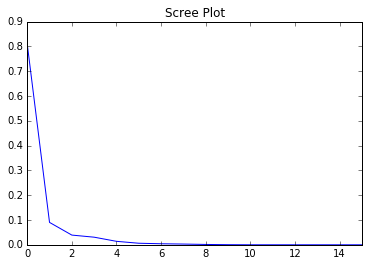

In [10]:
pd.Series(pca.explained_variance_ratio_).plot(title='Scree Plot');

###### Get the Transformed Data

In [12]:
transformed = pca.fit_transform(df.iloc[:, 1:])
reduced = transformed[:, :2]
data = pd.DataFrame(reduced, columns=['p1', 'p2'])

###### Fit Regression on the Transformed Data

In [13]:
model = sms.OLS(df.salary_in_thousands_of_dollars.reset_index().drop('index', axis=1), sms.add_constant(data))

In [14]:
results = model.fit()

In [15]:
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     salary_in_thousands_of_dollars   R-squared:                       0.425
Model:                                        OLS   Adj. R-squared:                  0.421
Method:                             Least Squares   F-statistic:                     120.4
Date:                            Mon, 21 Mar 2016   Prob (F-statistic):           6.90e-40
Time:                                    17:01:25   Log-Likelihood:                -2715.8
No. Observations:                             329   AIC:                             5438.
Df Residuals:                                 326   BIC:                             5449.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------